# -- Práctica 2

# CLUSTERING (AGRUPACIÓN) DE SEMILLAS

## 1. Comparación visual de escalados con PCA


Para comprobar qué técnica de escalado es más adecuada para nuestro conjunto de datos, aplicamos los siguientes pasos:

- Se probaron tres técnicas de escalado: **MinMaxScaler**, **StandardScaler** y **RobustScaler**.
- Después del escalado, se aplicó un **Análisis de Componentes Principales (PCA)** para reducir la dimensionalidad a 2 componentes, lo que nos permite visualizar los datos en 2D.
- Finalmente, se colorearon los puntos según la clase de semilla (`Kama`, `Rosa` y `Canadian`) para facilitar la interpretación visual.

La semilla utilizada para asegurar la reproducibilidad es **100474933**.

A continuación, se muestran las representaciones visuales para cada escalado:



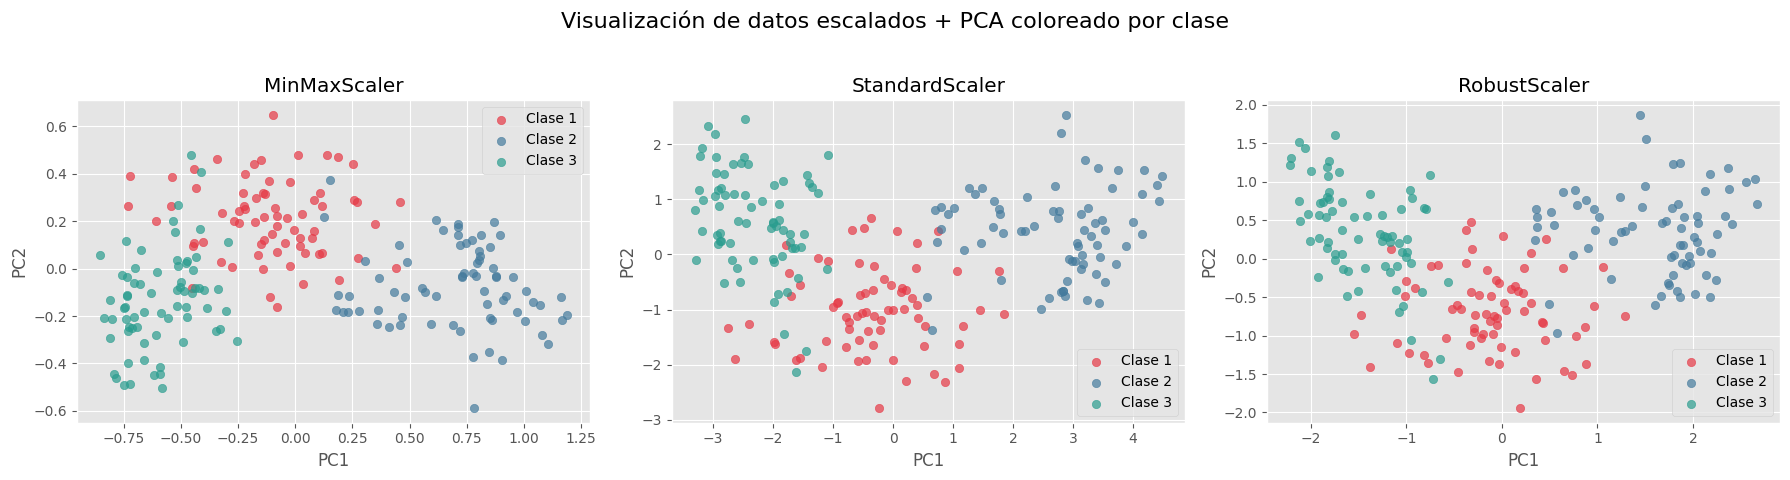

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Semilla
random_state = 100474933
np.random.seed(random_state)

# Cargar los datos
ruta = "data/semillas.csv"
datos = pd.read_csv(ruta)

# Separar características y clase
X = datos.drop(columns="clase")
y = datos["clase"]

# Diccionario de scalers
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler()
}

# Colores para las clases
colores = {1: "#E63946", 2: "#457B9D", 3: "#2A9D8F" }
nombres_clases = {1: "Kama", 2: "Rosa", 3: "Canadian"}  

# Crear una figura con subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Aplicar cada scaler + PCA y graficar
for ax, (nombre, scaler) in zip(axes, scalers.items()):
    pipeline = Pipeline([
        ("scaler", scaler),
        ("pca", PCA(n_components=2, random_state=random_state))
    ])
    X_pca = pipeline.fit_transform(X)

    for clase in sorted(y.unique()):
        ax.scatter(
            X_pca[y == clase, 0],
            X_pca[y == clase, 1],
            label=f"Clase {clase}",
            alpha=0.7,
            color=colores[clase]
        )
    
    ax.set_title(nombre)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.grid(True)
    ax.legend()

plt.suptitle("Visualización de datos escalados + PCA coloreado por clase", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Conclusión visual del escalado con PCA

A partir de las visualizaciones obtenidas, se pueden extraer las siguientes observaciones:

- **MinMaxScaler**: Es la técnica que ofrece una representación más clara y separada de las clases en el espacio PCA. La estructura de los datos proyectados en 2D permite distinguir con nitidez las tres agrupaciones, lo que indica que este escalado ha capturado bien las relaciones relativas entre muestras. Además, es el que logra mayor varianza explicada (91.81%).

- **StandardScaler**: Aunque también muestra una buena separación entre clases, las proyecciones son ligeramente más solapadas. La varianza explicada es algo menor (88.98%), y la visualización sugiere algo más de dispersión dentro de los grupos.

- **RobustScaler**: A pesar de ser útil frente a valores atípicos, en este caso no ofrece una ventaja visual clara. Las clases están más mezcladas, y la varianza explicada es la más baja (86.91%).

**Conclusión**: La técnica de escalado que ofrece una representación más clara y compacta de los datos en el espacio PCA es **MinMaxScaler**, por lo que se recomienda continuar la práctica utilizando este método.



In [ ]:
for name, scaler in scalers.items():
    pipe = Pipeline([
        ("scaler", scaler),
        ("pca", PCA(n_components=2, random_state=random_state))
    ])
    X_pca = pipe.fit_transform(X)
    pca = pipe.named_steps["pca"]
    varianza = pca.explained_variance_ratio_
    print(f"{name}: {varianza}, Varianza total explicada: {varianza.sum():.4f}")

MinMaxScaler: [0.78903362 0.1290949 ], Varianza total explicada: 0.9181
StandardScaler: [0.71874303 0.17108184], Varianza total explicada: 0.8898
RobustScaler: [0.66945748 0.19962637], Varianza total explicada: 0.8691


### Varianza explicada por los componentes principales (PCA)

Al aplicar **PCA (Análisis de Componentes Principales)** con 2 componentes, transformamos nuestros datos originales (de 7 dimensiones) a un espacio de solo 2 dimensiones, con el objetivo de **visualizar mejor los datos y sus posibles agrupaciones**.

PCA selecciona automáticamente los dos ejes (componentes) que **más información (varianza) retienen** de los datos originales.

#### ¿Qué significa "varianza explicada"?

La **varianza explicada** indica **cuánta información (dispersión de los datos)** conserva cada componente principal respecto a los datos originales:

- El **primer componente (PC1)** captura la mayor parte de la varianza posible.
- El **segundo componente (PC2)** captura la mayor parte de la varianza restante, bajo la condición de ser ortogonal (independiente) al primero.

### Varianza explicada por los dos primeros componentes

| Scaler           | 1ª Componente | 2ª Componente | Varianza total |
|------------------|---------------|---------------|----------------|
| **MinMaxScaler**     | 0.7890        | 0.1291        | **0.9181**      |
| **StandardScaler**   | 0.7187        | 0.1711        | **0.8898**      |
| **RobustScaler**     | 0.6695        | 0.1996        | **0.8691**      |

---

### Conclusión

- El escalado con **MinMaxScaler** consigue la **mayor varianza acumulada** (91.81%) en los dos primeros componentes principales del PCA, lo que indica que conserva mejor la estructura de los datos al proyectarlos en 2D.
- **StandardScaler** logra un buen equilibrio, con un 88.98% de varianza explicada, manteniendo una distribución centrada y sin grandes distorsiones.
- Aunque **RobustScaler** puede ser útil frente a valores atípicos, en este conjunto concreto **preserva menos varianza total** (86.91%) y no ofrece una visualización más clara que los anteriores.

Por tanto, **MinMaxScaler sería el más apropiado** para este análisis visual con PCA.



---

### Conclusión visual y cuantitativa del escalado con PCA

A partir de las visualizaciones y del análisis de varianza explicada, se pueden extraer las siguientes observaciones:

- **MinMaxScaler**:
  - Ofrece la mayor **varianza acumulada** en las dos primeras componentes (91.81%), lo que indica que preserva mejor la información original tras el PCA.
  - Además, visualmente proporciona una **separación clara entre las clases** en el espacio 2D, con agrupaciones bien definidas y poco solapadas.

- **StandardScaler**:
  - Tiene una varianza total algo menor (88.98%) y, aunque la visualización también muestra cierta estructura, las clases están más dispersas y hay algo más de solapamiento entre grupos.
  - Puede ser útil en otros contextos, pero en este caso no resulta tan efectiva.

- **RobustScaler**:
  - Aunque reduce la influencia de valores atípicos, no aporta una mejora notable en la visualización ni en la varianza explicada (86.91%).
  - Las clases aparecen más mezcladas en la proyección y con menor nitidez.

**Conclusión**:  
>>Tanto desde un punto de vista **cuantitativo** (mayor varianza explicada), como **visual** (mejor separación de clases), **MinMaxScaler** es la opción más adecuada para esta práctica. Se recomienda continuar con este método de escalado en los siguientes apartados.



# 2. Aplicación de técnicas de clustering no supervisado

En esta sección se aplican y comparan tres algoritmos de agrupamiento sobre los datos transformados mediante PCA (2 componentes), sin utilizar la variable de clase:
- **K-Means**
- **Clustering jerárquico aglomerativo**
- **DBSCAN**

Para cada técnica se estudian sus principales hiperparámetros, se analizan visualmente los resultados y se discute cuál representa mejor la estructura latente de los datos.

### 2.1 Clustering con K-Means

### 2.2 Clustering jerárquico (aglomerativo)

### 2.3 Clustering con DBSCAN